In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
dataframe = pd.read_csv("Melbourne_housing.csv")

In [7]:
dataframe.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5


In [8]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"], dayfirst = True)

In [10]:
len(dataframe["Date"].unique())/4

8.5

In [14]:
var = dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending = False).groupby("Date").std()
count = dataframe[dataframe["Type"]=="h"].sort_values("Date",ascending=False).groupby("Date").count()
mean = dataframe[dataframe["Type"]=="h"].sort_values("Date",ascending=False).groupby("Date").mean()


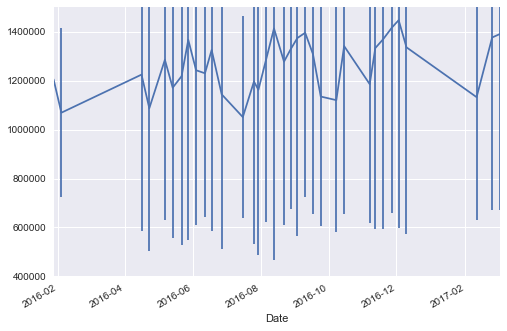

In [15]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [17]:
means=dataframe[(dataframe["Type"]=="h") & (dataframe["Distance"]<13)].dropna().sort_values("Date", ascending=False).groupby("Date").mean()
errors=dataframe[(dataframe["Type"]=="h")& (dataframe["Distance"]<13)].dropna().sort_values("Date", ascending=False).groupby("Date").std()

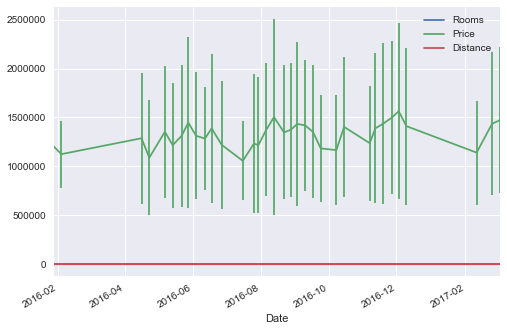

In [18]:
# fig; ex = plt.subplots()
means.plot(yerr=errors)

In [19]:
dataframe[dataframe["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Distance
Date,,,
2016-01-28,3.500000,1.205000e+06,10.100000
2016-02-04,2.958333,1.068888e+06,10.245833
2016-04-16,3.271552,1.224499e+06,8.964655
2016-04-23,3.181818,1.087059e+06,8.721818
2016-05-07,3.279152,1.285205e+06,8.995760
2016-05-14,3.191176,1.171023e+06,8.664216
2016-05-22,3.330144,1.218111e+06,9.051675
2016-05-28,3.452055,1.366617e+06,9.108219
2016-06-04,3.356164,1.242345e+06,9.271233


In [23]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
dataframe[(dataframe["Type"]=="h")&
         (dataframe["Distance"]<14) &
         (dataframe["Distance"]>13.7)].sort_values("Date",ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()


Rooms   Price  Distance
Suburb            SellerG                               
Albion            Barry            2.2  646.0k      13.9
                  Bells            3.0  779.0k      13.9
                  Douglas          3.5  637.5k      13.9
                  FN               3.0  625.0k      13.9
                  Sweeney          3.0  637.7k      13.9
                  Village          3.0  760.0k      13.9
                  hockingstuart    3.5  687.2k      13.9
Altona            Barlow           3.3    1.0M      13.8
                  Compton          2.0  535.6k      13.8
                  Greg             3.5  984.8k      13.8
                  Sweeney          3.5  811.5k      13.8
                  hockingstuart    3.0  885.4k      13.8
Bentleigh East    Beller           3.0  900.0k      13.9
                  Buxton           3.3    1.1M      13.9
                  C21              3.2    1.2M      13.9
                  First            4.0    1.0M      13.9
                  Gary             3.6    1.2M      13.9
                  Greg             3.0  950.0k      13.9
                  Hodges           3.8    1.1M      13.9
                  Marshall         4.0    1.4M      13.9
                  McGrath          3.0    1.1M      13.9
                  Melbourne        4.0    1.1M      13.9
                  Nick             3.0    1.0M      13.9
                  Paul             3.0    1.6M      13.9
                  RT               4.0    1.2M      13.9
                  Ray              3.5  982.8k      13.9
                  Thomson          3.0  700.0k      13.9
                  Woodards         3.3    1.2M      13.9
                  hockingstuart    3.1    1.1M      13.9
Doncaster         ASL              4.0    1.2M      13.9
                  Assisi           3.0  826.0k      13.9
                  Barry            3.6    1.4M      13.9
                  Darren           3.0    1.3M      13.9
                  Fletchers        3.5    1.2M      13.9
                  Jellis           4.2    1.4M      13.9
                  Parkes           3.5    1.2M      13.9
                  Philip           3.5    1.4M      13.9
                  RW               4.0    1.4M      13.9
                  Ray              3.6    1.2M      13.9
                  Vic              3.0    1.1M      13.9
                  hockingstuart    3.2    1.2M      13.9
Templestowe Lower Barry            4.0    1.1M      13.8
                  Fletchers        3.8    1.1M      13.8
                  Jellis           3.8    1.2M      13.8
                  Lindellas        4.0  975.0k      13.8
                  Mason            4.0  790.0k      13.8
                  Parkes           3.0    1.5M      13.8
                  Philip           3.2    1.1M      13.8
                  RT               3.0  650.0k      13.8
                  Ray              3.2    1.1M      13.8
                  Zahn             4.0    1.2M      13.8
                  hockingstuart    4.2    1.1M      13.8
Viewbank          Barry            4.0  916.7k      13.8
                  Buckingham       3.0  880.0k      13.8
                  Darren           4.0    1.0M      13.8
                  Fletchers        4.0  978.5k      13.8
                  Miles            3.8  961.4k      13.8
                  Morrison         3.0  820.0k      13.8
                  Nelson           3.7  919.0k      13.8
                  Ray              3.0  765.0k      13.8

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


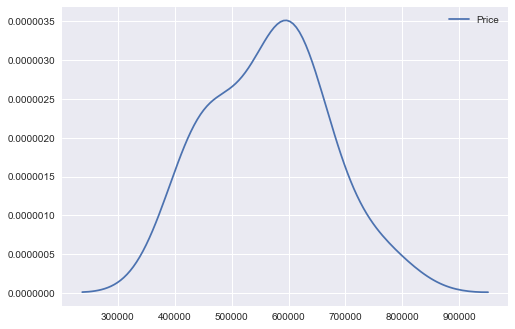

In [24]:
sns.kdeplot(dataframe[(dataframe["Suburb"]=="Northcote") & (dataframe["Type"] =="u") & (dataframe["Rooms"]==2)]["Price"])

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


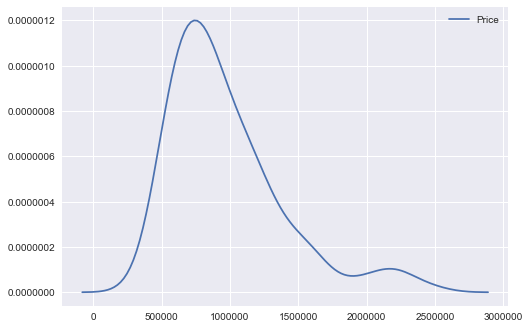

In [26]:
sns.kdeplot(dataframe["Price"][((dataframe["Type"]=="u")& (dataframe["Distance"]>3) & (dataframe["Distance"]<10) & (dataframe["Rooms"]>2))])

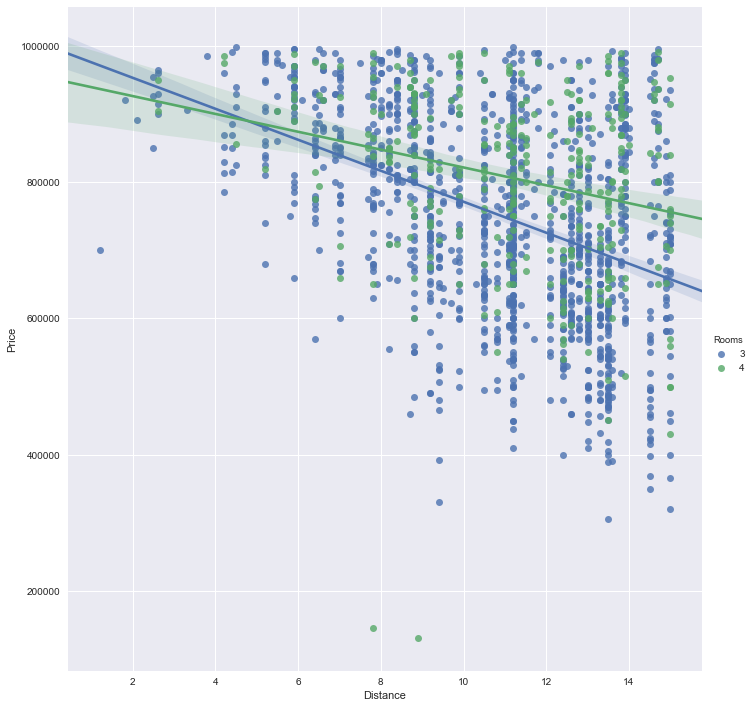

In [27]:
sns.lmplot("Distance","Price", dataframe[(dataframe["Rooms"]<=4) & (dataframe["Rooms"] >2) & (dataframe["Type"]=="h") & (dataframe["Price"]<1000000)].dropna(),hue="Rooms", size=10)

In [28]:
dataframe[dataframe["Rooms"]<4].dropna().groupby(["Distance","Rooms"]).mean()

Price
Distance Rooms        
1.2      1      421.8k
         2      605.8k
         3      828.0k
1.5      1      666.7k
         2        1.5M
         3        1.9M
1.6      1      474.0k
         2      935.1k
         3        1.3M
1.8      1      372.5k
         2      758.9k
         3        1.3M
1.9      1      459.0k
         2      774.0k
         3        1.1M
2.1      1      551.8k
         2      935.6k
         3        1.6M
2.3      1      394.6k
         2      717.0k
         3        1.3M
2.5      1      437.1k
         2      946.8k
         3        1.3M
2.6      1      420.9k
         2      898.1k
         3        1.4M
2.8      1      433.2k
         2      679.4k
         3        1.1M
...                ...
13.1     1      288.0k
         2      603.0k
         3        1.3M
13.3     2      643.0k
         3      599.8k
13.5     1      280.0k
         2      467.4k
         3      612.1k
13.6     2      729.6k
         3      842.4k
13.7     1        1.1M
         2      856.8k
         3        1.4M
13.8     2      554.4k
         3      900.9k
13.9     1      332.0k
         2      687.0k
         3        1.0M
14.0     2      615.0k
         3      931.6k
14.5     2      523.8k
         3      758.9k
14.6     1      310.2k
         2      720.8k
         3      941.7k
14.7     2      763.4k
         3      941.9k
14.9     2      583.7k
         3      715.7k
15.0     3      643.4k

[248 rows x 1 columns]

In [29]:
dataframe.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance'],
      dtype='object')

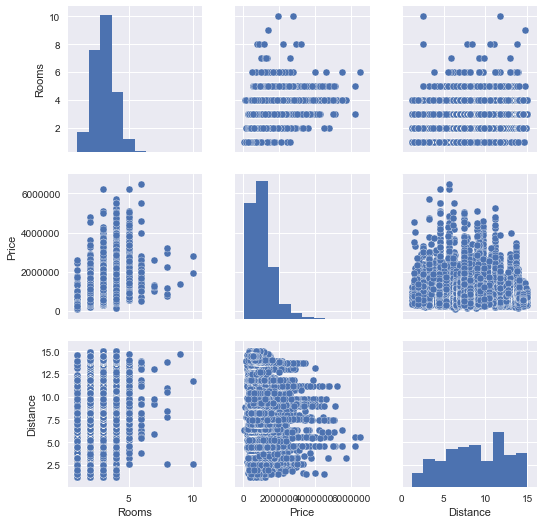

In [30]:
sns.pairplot(dataframe.dropna())

In [31]:
# Correlations. Seems plausible that number of rooms positively correlates with
#price, and price inversely with distance.


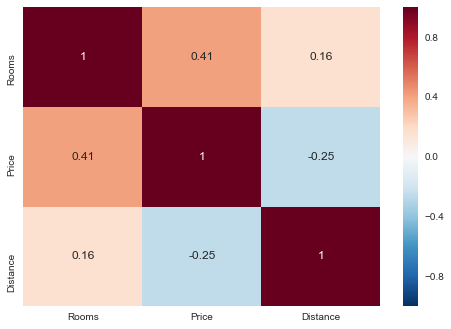

In [32]:
sns.heatmap(dataframe[dataframe["Type"]=="h"].corr(), annot=True)

In [33]:
from sklearn.cross_validation import train_test_split

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
dataframe_dr=dataframe.dropna().sort_values("Date")

In [37]:
dataframe_dr=dataframe_dr[dataframe_dr["Type"]=="u"]

In [40]:
dataframe_dr=dataframe_dr

In [41]:
from datetime import date

In [42]:
all_Date = {}

In [43]:
# Find out days since start
days_since_start = [(x-dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]

In [44]:
dataframe_dr["Daysj"] = days_since_start

In [48]:
#suburb_dummies = pd.get_dummies(dataframe_dr[["Suburb", "Type", "Method"]])
suburb_dummies = pd.get_dummies(dataframe_dr[["Type","Method"]])

In [53]:
all_Data = dataframe_dr.drop(["Address","Price","Date","SellerG","Suburb","Type","Method"],axis=1).join(suburb_dummies)

In [54]:
all_Data.head().to_csv("yujin.csv")

In [55]:
X=all_Data

In [57]:
y=dataframe_dr["Price"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [59]:
from sklearn.linear_model import LinearRegression


In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
print(lm.intercept_)

176701.848118


In [63]:
X.columns

Index(['Rooms', 'Distance', 'Daysj', 'Type_u', 'Method_PI', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [65]:
coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=["Coefficient"])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Rooms,252.0k
Method_SA,74.8k
Method_S,41.2k
Daysj,177.3
Type_u,0.0
Distance,-16.4k
Method_SP,-20.5k
Method_VB,-35.5k
Method_PI,-60.0k


In [66]:
predictions = lm.predict(X_test)

(200000, 1000000)

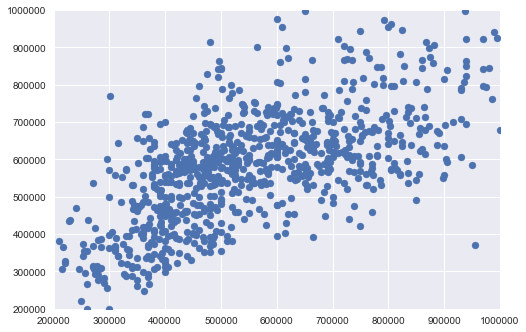

In [68]:
# Test vs Predctions

plt.scatter(y_test, predictions)
plt.ylim([200000, 1000000])
plt.xlim([200000, 1000000])

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


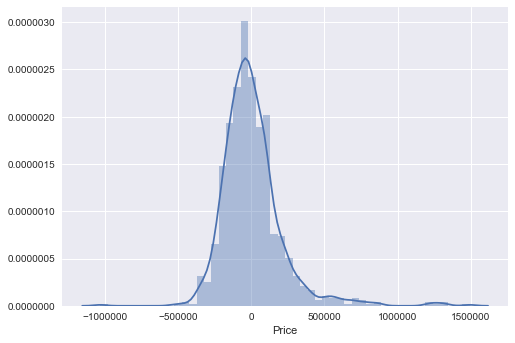

In [69]:
sns.distplot((y_test-predictions), bins=50)

In [70]:
from sklearn import metrics

In [71]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 143169.430304
MSE: 45973767285.8
RMSE: 214414.941844
